# Projet : Consommation et production électrique en France

<img width=400 src="https://1.bp.blogspot.com/-_cw5mPFrxmc/XtuawSHRV0I/AAAAAAAAEWQ/52ff8l3-MKI0_ZdlJpwwyrH6tgh9diaOQCLcBGAsYHQ/s1600/uses-of-electricity-in-our-daily-life.jpg">
<p style="text-align: left"> Une  photo kitsch du réseau électrique </p>

## Présentation Du Dataset


<img src="./assets/image1.png" width="300"/>
<img src="./assets/image2.png" width="300"/>

**Informations issues du site (allez voir vous même également) :**

Ce jeu de données, rafraîchi une fois par jour, présente les données régionales de janvier 2013 à 2023. Elles sont issues de l'application éCO2mix. Elles sont élaborées à partir des comptages et complétées par des forfaits. 

Vous y trouverez au pas quart d'heure :

- Les prévisions de consommation établies la veille (J-1) et celles réactualisées le jour même (J).

Vous y trouverez au pas demi-heure :

- La consommation réalisée.
- La production selon les différentes filières composant le mix énergétique.
- La consommation des pompes dans les Stations de Transfert d'Energie par Pompage (STEP).
- Les échanges physiques aux frontières.
- Une estimation des émissions de carbone générées par la production d'électricité en France.
- Les échanges commerciaux aux frontières.
- Le découpage des filières par technologie du mix de production (débute en 2013).



<img src="./assets/image3.png" width="800"/>


## Objectifs et modalités de l'étude

**Modalités de l'étude :** 

- Vous travaillerez en groupe de 2 à 3.    
   
- Une présentation de votre travail sur une question sera effectuée en fin du projet. 
   
**Les objectifs de cette étude sont multiples :** 

- Apprendre à charger et manipuler des données réelles complexes avec Pandas. 

- Manipuler des séries temporelles. 

- Analyser des données pour répondre à une question exploratoire. 

- Présenter et vulgariser votre recherche exploratoire. 

**Notes sur les données RTE** :

- Elles proviennent du (génial) site éCO2mix et sont disponibles pour tout le monde (opendata) : https://www.rte-france.com/eco2mix 
- Données agrégées au niveau national : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-national-cons-def/information/?disjunctive.nature 
- Données agrégées au niveau régional : https://opendata.reseaux-energies.fr/explore/dataset/eco2mix-regional-cons-def/information/?disjunctive.libelle_region&disjunctive.nature

## Conseils & Remarques sur l'exploration des données

- La première étape de chargement, exploration et nettoyage de données peut être chronophage lorsqu'on traite des sets de données **réels**... Cela fait partie du travail de data scientist, il faut s'y faire :-)

> It takes less than five lines of code to train a basic machine learning algorithm. Exploratory data analysis and data preparation in comparison take longer and comprise of 80% of the data scientist’s time."  https://towardsdatascience.com/build-the-story-around-data-using-exploratory-data-analysis-and-pandas-c85bf3beff87

- Quand vous faîtes des recherches et que vous manipulez les données, n'oubliez pas de clarifier : **Quelle question/ hypothèse essayez-vous de résoudre/de prouver/ d'invalider ?**

- Votre notebook doit être **compréhensible**. Il doit vous permettre de partager vos recherches. Le lecteur final doit pouvoir le lire comme une histoire (collègue, vous dans un futur proche, etc.). Utilisez du **markdown** pour commenter votre code, discuter des résultats, insérer des images, ...

- **Table of Content** : mettez vous une table des matières et activez le **synchronize collapse state**. Ca vous permettre de vous y retrouver plus facilement. 

   
- Garantissez la **causalité** de votre notebook : l'ordre d'exécution des cellules dans un notebook est complexe. Ne faîtes pas l'erreur de ne pas vérifier que vous pouvez exécuter l'ensemble de vos cellules dans l'ordre. Sinon vous n'arriverez plus à exécuter votre notebook. 

- N'oubliez pas de reprendre les étapes d'exploration classiques des données vues précédemment (projets GapMinder, Arbres de Grenoble, ...) : afficher les informations sur vos dataframes, regardez les données, faites des sauvegardes intermédiaires (format .pkl par exemple), cherchez les outliers, les données manquantes, etc... 

- C'est une analyse exploratoire : **tatonnez**, **faîtes des graphiques**, ... 


- Lorsque c'est nécessaire (selon ce que vous cherchez) penser à normaliser/standardiser les données

- N'hésitez pas à **consulter l'aide de Pandas** ou à chercher la réponse à vos questions sur internet (quasiment tous les bugs que vous observerez on déjà fait l'objet d'un post sur **stackoverflow**)

**Ressources** :
-  Markdown : https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html
-  Table of content : https://jupyterlab.readthedocs.io/en/stable/user/toc.html. 

# Chargement et préparation des données

&#x1F4A5; **To Do** 

- Charger les données nationales.
 
- Regarder les colonnes, sélectionner les données intéressantes.
 
- Les types inférés semblent-ils corrects ? Corriger si nécessaire (datetime, object, int, float, etc.)

- Choisir des noms de colonnes plus faciles à manipuler (espaces, accents...)
- Ressource : https://www.dataschool.io/pandas-dot-notation-vs-brackets/

- Choisir un index adéquat pour votre dataframe. Les lignes ont un comportement étrange, choisissez les lignes qui vous arrangent.

- Quelle période temporelle couvrent les données ?

- Faîtes un choix par rapport aux valeurs manquantes. Les garder sous forme de NaN ou une autre valeur ?

- Simplifiez le DataFrame : regardez vos colonnnes, cherchez à les comprendre et rassemblez celles que vous pouvez rassembler. 

- Sauvegardez vos données sous format **pkl** pour ne pas devoir refaire les pré-traitements à chaque fois que vous redémarrez le kernel.  


&#x1F4A5; **Ressources**

- La doc de pandas.

- Voici quelques fonctions en vrac dont vous aurez besoin (read_csv,  info,  drop, to_datetime, astype, nunique, set_index, 


## Solutions 

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 2

# Cette option nous permet de pouvoir afficher toutes les colonnes
pd.set_option('display.max_columns', 500)

In [3]:
# Chargement des données nationales
FOLDER = './data/'
file = 'eco2mix-national-cons-def.csv'
df_national = pd.read_csv(FOLDER + file, sep=';')
df_national.head(2)

/tmp/ipykernel_7784/1219535877.py:4: DtypeWarning: Columns (23,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_national = pd.read_csv(FOLDER + file, sep=';')


,Périmètre,Nature,Date,Heure,Date et Heure,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
0,France,Données définitives,2015-12-16,03:00,2015-12-16T03:00:00+01:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
1,France,Données définitives,2015-12-16,03:15,2015-12-16T03:15:00+01:00,NaN,52950,53050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Les colonnes Date, Heure, Date et Heure devraient etre en datetime
# Gaz - Cogénération (MW) et Ech. comm. Allemagne-Belgique (MW) ne devraient pas être object. 
df_national.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378816 entries, 0 to 378815
Data columns (total 37 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Périmètre                                  378816 non-null  object 
 1   Nature                                     378816 non-null  object 
 2   Date                                       378816 non-null  object 
 3   Heure                                      378816 non-null  object 
 4   Date et Heure                              378816 non-null  object 
 5   Consommation (MW)                          189407 non-null  float64
 6   Prévision J-1 (MW)                         378816 non-null  int64  
 7   Prévision J (MW)                           378816 non-null  int64  
 8   Fioul (MW)                                 189407 non-null  float64
 9   Charbon (MW)                               189407 non-null  float64
 10  Gaz (MW)

In [5]:
# On change le type de la colonne
df_national['Date et Heure'] = pd.to_datetime(df_national['Date et Heure'], utc=True)

# On supprime les colonnes Date et Heure qui ne vont pas servir (doublons)
df_national = df_national.drop(['Date', 'Heure'], axis='columns')

In [6]:
# Périmètre ne contient que la valeur 'France'
# Nature contient des données trop spécifiques pour nous (qualité de la collecte de données) 
df_national[['Périmètre', 'Nature']].nunique()

Périmètre    1
Nature       2
dtype: int64

In [7]:
# On va donc enlever ces deux colonnes 
df_national = df_national.drop(['Périmètre', 'Nature'], axis='columns')

In [8]:
# Date et heure devraient etre en index 
# (on aurait aussi pu mettre inplace=true)
df_national = df_national.set_index('Date et Heure')

In [9]:
df_national.head(4)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-16 02:00:00+00:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 02:15:00+00:00,NaN,52950,53050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-16 04:00:00+00:00,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,2513.0,-3283.0,1053.0,-12304.0,52.0,-1650.0,-2650.0,-2995.0,-3173.0,-417.0,19.0,256.0,53.0,3.0,2023,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 04:15:00+00:00,NaN,53300,53150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# On enlève les lignes où la consommation n'est pas définie
# (c'est un choix arbitraire)
df_national = df_national.dropna(axis='index', subset='Consommation (MW)')

In [11]:
df_national.head(4)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-12-16 02:00:00+00:00,54421.0,53500,53500,326.0,1280.0,2541.0,55263.0,4010.0,-1.0,2791.0,-2970.0,1040.0,-9858.0,52.0,-1750.0,-2650.0,-2995.0,-3173.0,-1122.0,18.0,257.0,50.0,3.0,2031,462.0,44.0,2146.0,646.0,0.0,593.0,225.0,222.0
2015-12-16 04:00:00+00:00,52632.0,52300,52200,328.0,1274.0,2714.0,56200.0,4138.0,-1.0,2513.0,-3283.0,1053.0,-12304.0,52.0,-1650.0,-2650.0,-2995.0,-3173.0,-417.0,19.0,256.0,53.0,3.0,2023,643.0,44.0,2046.0,468.0,0.0,601.0,230.0,222.0
2015-12-16 06:00:00+00:00,63733.0,64000,63300,348.0,2263.0,5308.0,58001.0,4024.0,-1.0,3728.0,-546.0,996.0,-10388.0,70.0,-1650.0,-2100.0,-3150.0,-3135.0,52.0,19.0,279.0,50.0,3.0,2103,3167.0,35.0,2716.0,1011.0,0.0,537.0,238.0,222.0
2015-12-16 10:00:00+00:00,67650.0,67000,66800,351.0,2057.0,6687.0,58324.0,3415.0,1215.0,6342.0,-41.0,960.0,-11661.0,69.0,-1850.0,-2100.0,-3150.0,-3135.0,-2049.0,17.0,279.0,54.0,3.0,2075,4574.0,35.0,3440.0,1678.0,1224.0,503.0,239.0,218.0


In [12]:
# Quelle période temporelle couvrent les données ? 

debut = df_national.index.min()
fin = df_national.index.max()

print(f"""
Les données vont de {debut} à {fin}
""")


Les données vont de 2011-12-31 23:00:00+00:00 à 2023-01-31 22:30:00+00:00



In [13]:
# Les index ne sont pas rangés. Faisons le 
df_national = df_national.sort_index()

In [14]:
# Maintenant on est content.e.s, tout est bien rangé. 
df_national.head(3)

,Consommation (MW),Prévision J-1 (MW),Prévision J (MW),Fioul (MW),Charbon (MW),Gaz (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Taux de CO2 (g/kWh),Ech. comm. Angleterre (MW),Ech. comm. Espagne (MW),Ech. comm. Italie (MW),Ech. comm. Suisse (MW),Ech. comm. Allemagne-Belgique (MW),Fioul - TAC (MW),Fioul - Cogénération (MW),Fioul - Autres (MW),Gaz - TAC (MW),Gaz - Cogénération (MW),Gaz - CCG (MW),Gaz - Autres (MW),Hydraulique - Fil de l'eau + éclusée (MW),Hydraulique - Lacs (MW),Hydraulique - STEP turbinage (MW),Bioénergies - Déchets (MW),Bioénergies - Biomasse (MW),Bioénergies - Biogaz (MW)
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,58200,58200,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940.0,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 23:30:00+00:00,58315.0,57200,56900,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:00:00+00:00,56231.0,55200,55100,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0,34.0,-1750.0,-1400.0,-862.0,-2625.0,-2714,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# J'enlève tous les caractères qui m'empêchent d'avoir accès à la 'dot notation' pour la sélection de colonnes
col_names = ['Consommation', 'PrevisionJ_1', 'PrevisionJ', 'Fioul', 'Charbon',
       'Gaz', 'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioenergies', 'Ech_physiques', 'Taux_CO2',
       'Ech_comm_Angleterre', 'Ech_comm_Espagne', 'Ech_comm_Italie',
       'Ech_comm_Suisse', 'Ech_comm_Allemagne_Belgique', 'Fioul_TAC',
       'Fioul_Cogeneration', 'Fioul_Autres', 'Gaz_TAC',
       'Gaz_Cogeneration', 'Gaz_CCG', 'Gaz_Autres',
       'Hydraulique_Fil_de_eau_et_éclusée', 'Hydraulique_Lacs',
       'Hydraulique_STEP_turbinage', 'Bioenergies_Dechets',
       'Bioenergies_Biomasse', 'Bioenergies_Biogaz']

df_national.columns = col_names

In [16]:
# Les colonnes ont des noms plus pratiques
df_national.head(3)

,Consommation,PrevisionJ_1,PrevisionJ,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,Pompage,Bioenergies,Ech_physiques,Taux_CO2,Ech_comm_Angleterre,Ech_comm_Espagne,Ech_comm_Italie,Ech_comm_Suisse,Ech_comm_Allemagne_Belgique,Fioul_TAC,Fioul_Cogeneration,Fioul_Autres,Gaz_TAC,Gaz_Cogeneration,Gaz_CCG,Gaz_Autres,Hydraulique_Fil_de_eau_et_éclusée,Hydraulique_Lacs,Hydraulique_STEP_turbinage,Bioenergies_Dechets,Bioenergies_Biomasse,Bioenergies_Biogaz
Date et Heure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,58200,58200,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940.0,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 23:30:00+00:00,58315.0,57200,56900,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-1750.0,-1200.0,-862.0,-2625.0,-2940,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-01 00:00:00+00:00,56231.0,55200,55100,492.0,25.0,3834.0,51747.0,3536.0,0.0,7598.0,-1730.0,721.0,-9993.0,34.0,-1750.0,-1400.0,-862.0,-2625.0,-2714,NaN,NaN,NaN,NaN,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# En essayant ça : 
# pd.to_numeric(df_national.Ech_comm_Allemagne_Belgique)
# On obtient une erreur : ValueError: Unable to parse string "ND" at position 4078
# On va donc les transformer en NaN d'abord 

# Il aurait fallu le faire au chargement du dataframe, ça aurait été plus simple 
# Mais moins pédagogique ! 

# On importe juste pour avoir accès aux nans...
import numpy as np

# On transforme les ND en NaN
df_national = df_national.replace('ND', np.nan)

# On transforme tout le monde en float
df_national = df_national.astype('float64')

# Executer df_national.info() ppour vérifier que tout va bien. 

In [18]:
print(f"""
valeur min dans le dataframe : {df_national.min().min()}
valeur max dans le dataframe : {df_national.max().max()}
""")


valeur min dans le dataframe : -17891.0
valeur max dans le dataframe : 102700.0



In [19]:
# Valeurs que peux prendre un float 32, on est large ! 
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [20]:
# On transforme tout le monde en float32
# On gagne 50% de mémoire
df_national = df_national.astype('float32')

In [21]:
# On sauvegarde nos traitements, pour ne pas avoir à tout refaire
df_national.to_pickle('data_clean.pkl')

# Exploration du dataset National

## Réflexion

Avant de vous lancer dans la mise en pratique, prenez quelques minutes (max 30 minutes) pour observer les données et explorer les premières statistiques descriptives : 
- Quelles questions vous posez-vous sur les données ? 

- Qu'avez-vous envie d'explorer ? Soyez créatifs !

## Mise en application

&#x1F4A5; **To Do**
    
L'objectif ici est de **comprendre les données** présentes dans le dataset national que vous avez créé. 

---
- **Affichez vos données pour mieux les comprendre** : choisir plusieurs durées pour afficher vos données : semaine, mois, année, durée totale, faîtes des comparaisons... (pensez à utiliser des choses comme rolling mean) 
    - Tracer l'évolution de la consommation
    - Tracer l'évolution de la production par source d'énergie et au niveau global,
    - Tracer l'évolution de émissions de CO2.

---

- **Mix énergétique** :
    - Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
    - Quelle est la source de production largement majoritaire ?
    - Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
    - Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
    - Quelle est la part de chaque filière de production d'énergies renouvelables (hydrayulique, solaire, ...) 

---

- **Autonomie électrique** : comparer la production totale française à la consommation totale. Quelle est le taux d'indépendance énergétique de la france au cours du temps ? C'est à dire la proportion du temps où la France est autonome en énergie. Faire le caclul au global mais aussi par année et par mois.  

---

- **Equilibre du réseau électrique** : Vérifier que la production, la consommation et les échanges commerciaux s'équilibrent en permanence. <br/> Ressource pour comprendre : https://fr.wikipedia.org/wiki/Ajustement_offre-demande_d%27%C3%A9lectricit%C3%A9 

---

- **Analyser la tendance des données** :
    - Analyser la saisonnalité des productions, comparer les mois de l'année entre eux. Quand consomme-t-on le plus ?
    - Printemps vs Eté vs Automne vs Hiver
    - Quelle est la tendance générale de l'évolution à long terme de la production d'énergie solaire ?  

---

- **Impact des sources primaires de production sur le Taux de CO2** :
    - Corrélez les données entre elles et déduisez-en l'impact positif ou négatif de chacune des sources de production sur le taux de CO2 émis (estimation). 

---

- **Géopolitique** :
    - Visualisez et analysez l'impact du COVID et de la guerre en Ukraine sur le réseau électrique ?

---

&#x1F4A5; **Aide**
- Ressource utile pour vous aider à analyser les données : https://www.statistiques.developpement-durable.gouv.fr/edition-numerique/bilan-energetique-2020/
- `pandas.DataFrame.rolling` vous aidera à afficher vos données et en comprendre les tendances. 
- Les `pandas.Grouper` vous aideront pour grouper les données temporelles.
- la méthode `.plot()` fonctionne parfaitement avec un datetime en index
- Corrélation : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
- attention aux `NaN` pour les plots.

## Solutions

In [22]:
df_national = pd.read_pickle('data_clean.pkl')

### Affichez vos données pour mieux les comprendre

##### Affichage : Consommation 1ère semaine de Janvier 2013

<Axes: xlabel='Date et Heure'>

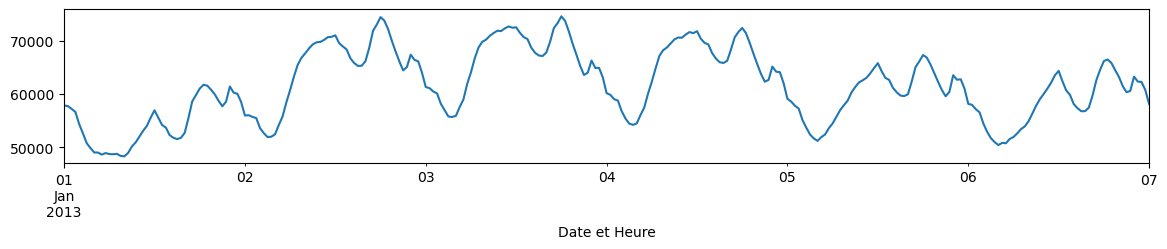

In [23]:
# Option 1 : En utilisant query
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

df_national \
    .query(' @start_date <= index <= @end_date ') \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

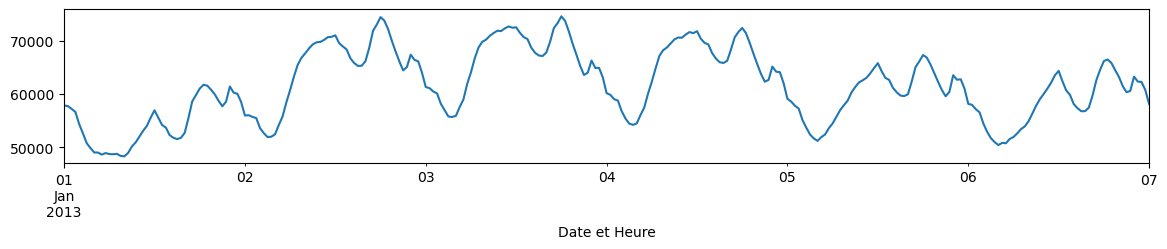

In [24]:
# Option 2 : en utilisant loc
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

df_national \
    .loc[(start_date <= df_national.index) & (df_national.index <= end_date)] \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

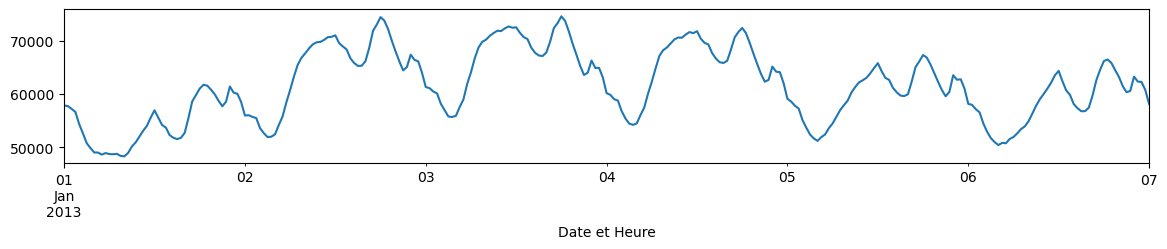

In [25]:
# Option 3 : avec date_range

start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)
dates = pd.date_range(start=start_date, end=end_date, freq='30min')

df_national \
    .loc[df_national.index.isin(dates)] \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

<Axes: xlabel='Date et Heure'>

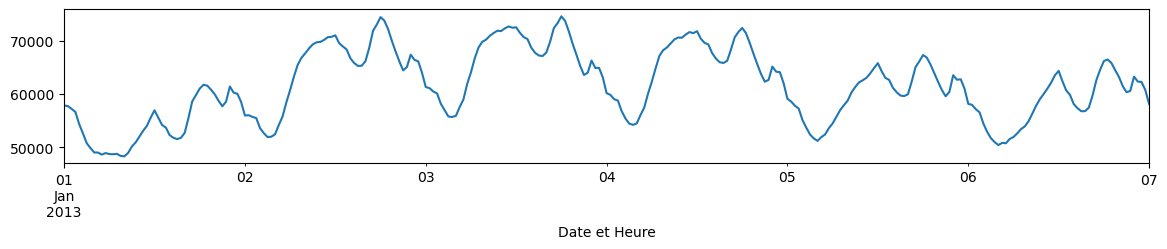

In [26]:
# Option 4 : avec date_range et query
start_date = pd.to_datetime("2013-01-01", utc=True)
end_date = pd.to_datetime("2013-01-07", utc=True)

dates = pd.date_range(start=start_date, end=end_date, freq='30min')

df_national \
    .query('index in @dates') \
    .Consommation \
    .plot(
        figsize=(14, 2)
    )

##### Affichage : Consommation au mois de Janvier 2013

<Axes: xlabel='Date et Heure'>

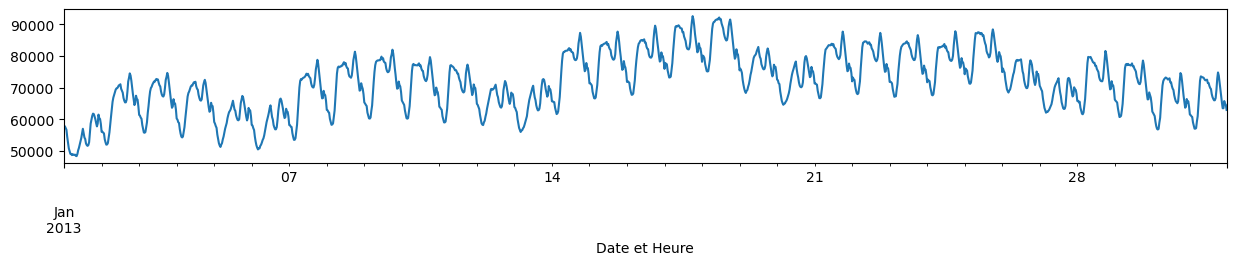

In [27]:
df_national.Consommation.loc['Jan-2013'].plot()

##### Comparaison entre les mois de Janvier 2013 et 2014

<Axes: xlabel='Date et Heure'>

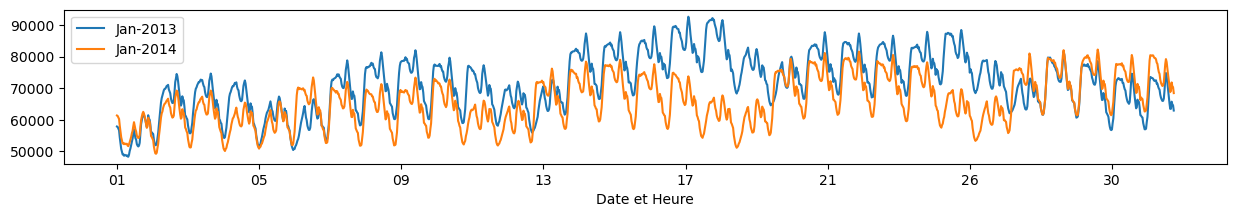

In [28]:
pd.DataFrame(
    index=df_national.Consommation.loc['Jan-2013'].index.strftime('%d'),
    data={
        "Jan-2013": df_national.Consommation.loc['Jan-2013'].values,
        "Jan-2014": df_national.Consommation.loc['Jan-2014'].values
    }
).plot()

Une écriture alternative pour arriver au même résultat. C'est plus verbeux mais ça donne des outils mobilisables dans la vie :  

Text(0.5, 1.0, 'Consumption 2013 vs. 2014')

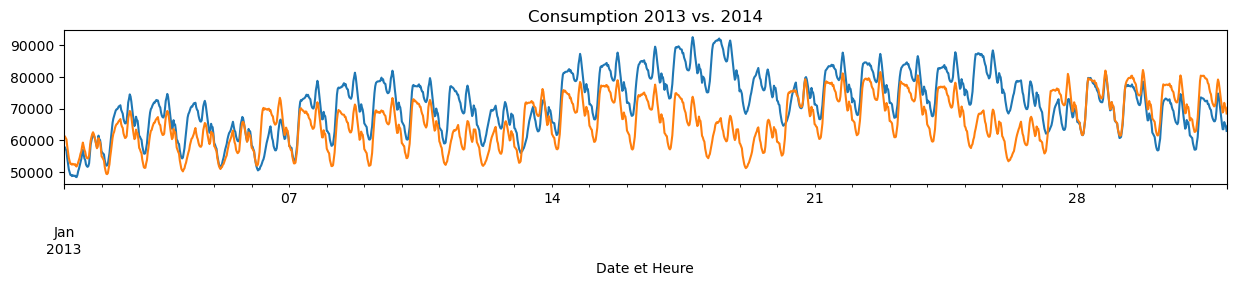

In [29]:
df_january = df_national.loc[
    (df_national.index.month_name() == 'January') & 
    (df_national.index.year == 2013)
]

df_january_2014 = df_national.loc[(
    df_national.index.month_name() == 'January') & 
    (df_national.index.year == 2014)
]

fig, ax = plt.subplots()
df_january.Consommation.dropna().plot(ax=ax)
df_january_2014.index = df_january_2014.index - pd.DateOffset(years=1)
df_january_2014.Consommation.dropna().plot(ax=ax)

ax.set_title("Consumption 2013 vs. 2014")

### Mix énergétique

- Trouvez plusieurs manières de visualiser les données de production : plot, pie chart, rolling mean...
- Quelle est la source de production largement majoritaire ?
- Quelle est l'évolution de la part des énergies fossiles dans le mix énergétique ?  
- Quelle est l'évolution de la part des énergies renouvelables dans le mix énergétique français ?
- Quelle est la part de chaque filière de production d'énergies renouvelables (hydrayulique, solaire, ...)

In [30]:
# Trop de colonnes, on va s'intéresser à moins de détails
df_national.columns

Index(['Consommation', 'PrevisionJ_1', 'PrevisionJ', 'Fioul', 'Charbon', 'Gaz',
       'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
       'Bioenergies', 'Ech_physiques', 'Taux_CO2', 'Ech_comm_Angleterre',
       'Ech_comm_Espagne', 'Ech_comm_Italie', 'Ech_comm_Suisse',
       'Ech_comm_Allemagne_Belgique', 'Fioul_TAC', 'Fioul_Cogeneration',
       'Fioul_Autres', 'Gaz_TAC', 'Gaz_Cogeneration', 'Gaz_CCG', 'Gaz_Autres',
       'Hydraulique_Fil_de_eau_et_éclusée', 'Hydraulique_Lacs',
       'Hydraulique_STEP_turbinage', 'Bioenergies_Dechets',
       'Bioenergies_Biomasse', 'Bioenergies_Biogaz'],
      dtype='object')

In [31]:
# On ne va garder que l'aggrégation de certaines colonnes
columns_of_interest = ['Consommation', 'Fioul', 'Charbon',
                       'Gaz', 'Nucleaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage',
                       'Bioenergies', 'Ech_physiques', 'Taux_CO2']

# On aggrège les échanges commerciaux
echanges = ['Ech_comm_Angleterre',
            'Ech_comm_Espagne',
            'Ech_comm_Italie',
            'Ech_comm_Suisse',
            'Ech_comm_Allemagne_Belgique']

df_national_simple = df_national[columns_of_interest].copy()
df_national_simple['Echanges_commerciaux'] = df_national[echanges].sum(
    axis='columns')

# On prépare des nouvelles colonnes ici pour pouvoir afficher l'évolution 
# des renouvelables et fossiles au cours du temps. 
source_fossiles = ['Fioul', 'Charbon', 'Gaz']
renouvelables = ['Eolien', 'Solaire', 'Hydraulique', 'Bioenergies']
df_national_simple['Fossiles'] = df_national_simple[source_fossiles].sum(axis=1)
df_national_simple['Renouvelables'] = df_national_simple[renouvelables].sum(axis=1)

# On ajoute également une colonne contenant la production totale
production = ['Fioul', 'Charbon', 'Gaz', 'Nucleaire', 'Eolien',
              'Solaire', 'Hydraulique', 'Bioenergies']

df_national_simple['Production'] = df_national_simple[production].sum(axis=1)


# On regarde
df_national_simple.head(2)

,Consommation,Fioul,Charbon,Gaz,Nucleaire,Eolien,Solaire,Hydraulique,Pompage,Bioenergies,Ech_physiques,Taux_CO2,Echanges_commerciaux,Fossiles,Renouvelables,Production
Date et Heure,,,,,,,,,,,,,,,,
2011-12-31 23:00:00+00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-9377.0,4333.0,12229.0,69259.0
2011-12-31 23:30:00+00:00,58315.0,492.0,25.0,3816.0,52697.0,3588.0,0.0,7922.0,-1139.0,719.0,-9806.0,33.0,-9377.0,4333.0,12229.0,69259.0


Evolution des énergies fossiles vs renouvelables vs nucléaire au cours du temps.  

On garde chaque source d'énergie primaire

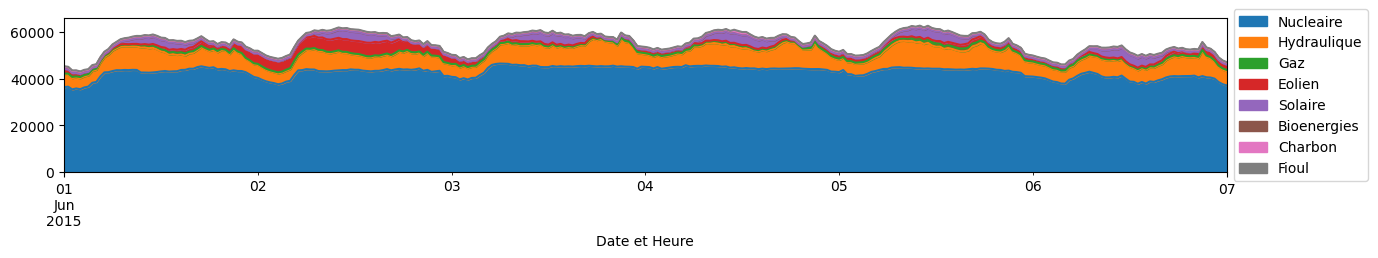

In [32]:
# On affiche toutes les sources d'énergies primaires en regard les unes des autres
# Nucléaire est très, très majoritaire.

# Choix des dates sur lesquelles on va représenter les données
start_date = "2015-06-01"
end_date = "2015-06-7"
dates = pd.date_range(start=start_date, end=end_date, freq='30min', tz='UTC')

# On réorganise les colonnes pour mettre les plus gros producteurs en bas du plot
columns_sorted = df_national_simple.loc[:, production].sum(
).sort_values(ascending=False).index


df_national_simple \
    .query('index in @dates') \
    .loc[:, production] \
    .reindex(columns_sorted, axis=1) \
    .plot.area() \
    .legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

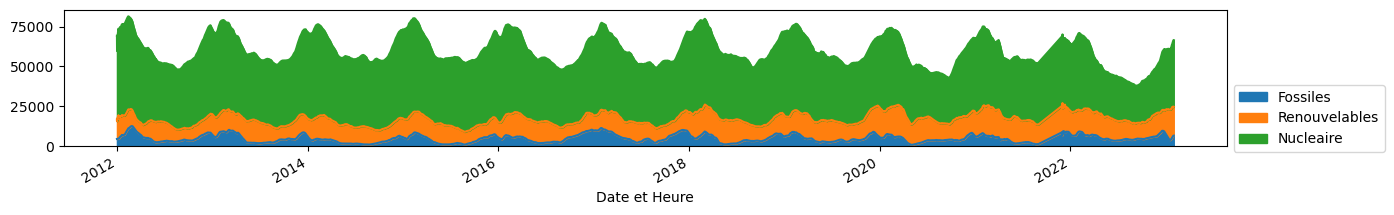

In [33]:
# Le timedelta nous sert pour donner une fenêtre au rolling mean. 
# Si on affiche l'ensemble des données sans les "lisser" alors on ne verrait pas grand chose. 

delta = timedelta(weeks=4)

( 
    df_national_simple[ ['Fossiles', 'Renouvelables', 'Nucleaire'] ] 
     .rolling(delta)
     .mean()
     .plot.area()
     .legend(bbox_to_anchor=(1.0, 0.5))
)

##### Statistiques sur les séries temporelles 

<Axes: >

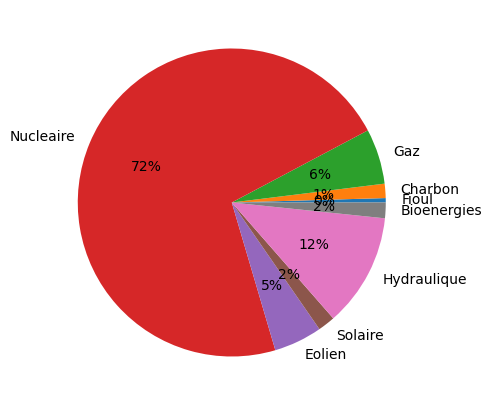

In [34]:
df_national_simple[production].sum().plot(
    kind='pie', 
    labeldistance=1.1, 
    autopct='%1.0f%%',    
    figsize=(5,5)
)

### Autonomie électrique

La France est globalement excédentaire en production énergétique. 

<Axes: xlabel='Date et Heure'>

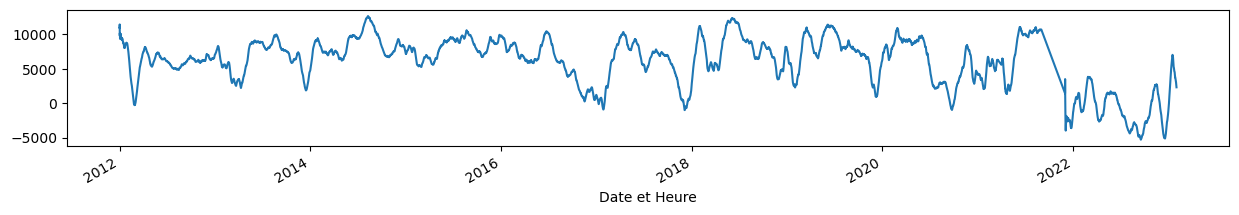

In [35]:
diff = df_national_simple.Production - df_national_simple.Consommation

delta = timedelta(weeks=4)
diff.rolling(delta).mean().plot()

In [36]:
# Autonomie au global
pct_excedentaire = (diff > 0).sum() / len(diff)
pct_deficitaire =  (diff < 0).sum() /len(diff)

print(f"""
Pourcentage du temps où la France est autonome énergétiquement : {pct_excedentaire}
Pourcentage du temps où la France est autonome énergétiquement : {pct_deficitaire}
""")


Pourcentage du temps où la France est autonome énergétiquement : 0.8809811675386865
Pourcentage du temps où la France est autonome énergétiquement : 0.11900827318948086



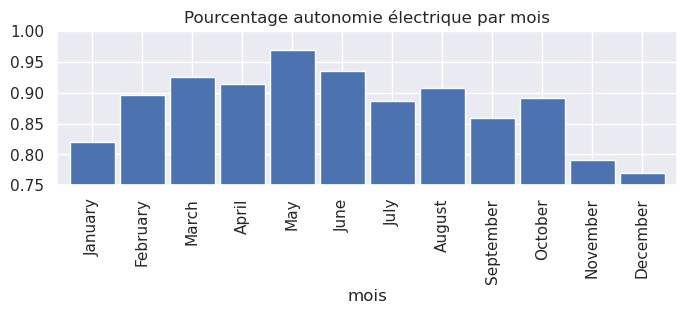

In [109]:
# Autonomie énergétique par mois

# On groupe en regardant le numéro le nom du mois dans l'index
monthly_grouped = diff.groupby(diff.index.strftime('%B'))

# Groupby un peu plus complexe, on utilise agg 
# pour pouvoir passer une fonction lambda qui nous arrange
monthly_autonomy = monthly_grouped.agg(func=lambda df: (df > 0).sum() / len(df))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',  'July', 'August', 'September', 'October', 'November', 'December']
monthly_autonomy = monthly_autonomy.reindex(month_order)

ax = monthly_autonomy.plot.bar(
    figsize=(8, 2),
    width=0.9,
    ylim=(0.75, 1),
    title='Pourcentage autonomie électrique par mois',
    xlabel='mois'
)

<Axes: title={'center': 'Pourcentage autonomie électrique par année'}, xlabel='année'>

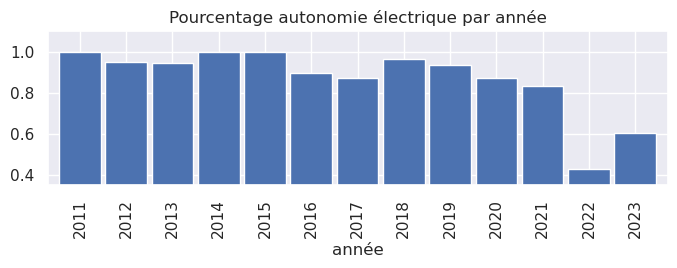

In [107]:
# Autonomie énergétique par année

# On utilise un grouper pour finement gérer ce que l'on cherche
grouper = pd.Grouper(freq='1YE')

# Groupby un peu plus complexe, on utilise agg 
# pour pouvoir passer une fonction lambda qui nous arrange
yearly_autonomy = diff.groupby(grouper).agg(func=lambda df: (df > 0).sum() / len(df))
yearly_autonomy.index = yearly_autonomy.index.strftime('%Y')

yearly_autonomy.plot.bar(
        figsize=(8, 2),
        width=0.9,
        ylim=(0.35, 1.1),
        title='Pourcentage autonomie électrique par année',
        xlabel='année'
)

On déduit de cette figure que la France perd de son autonomie énergétique au cours du temps : 
- Environ 100% du temps autonome en 2011
- Environ 50% du temps autonome en 2022

Il faudrait analyser précisément les raison de cette perte d'autonomie. 
- Baisse de la production ? 
- Hausse de la consommation ? 

### Equilibre du réseau électrique ?

Si on injecte trop d'électricité sur le réseau par rapport à la quantité consommée, 
la fréquence électrique augmente. Comme les centrales sont conçues pour fonctionner dans une certaine plage de fréquence, il y a un risque de déconnexion du réseau après un certain temps.

- https://www.energuide.be/fr/questions-reponses/pourquoi-le-reseau-electrique-doit-il-rester-en-equilibre/2136/

- une ressource plus complexe qui explique les causes du non équilibre : https://eepublicdownloads.entsoe.eu/clean-documents/Publications/SOC/Report_Deterministic_Frequency_Deviations_final_version.pdf
  
On peut essayer de vérifier que le bilan est (approximativement) nul. 


<Axes: xlabel='Date et Heure'>

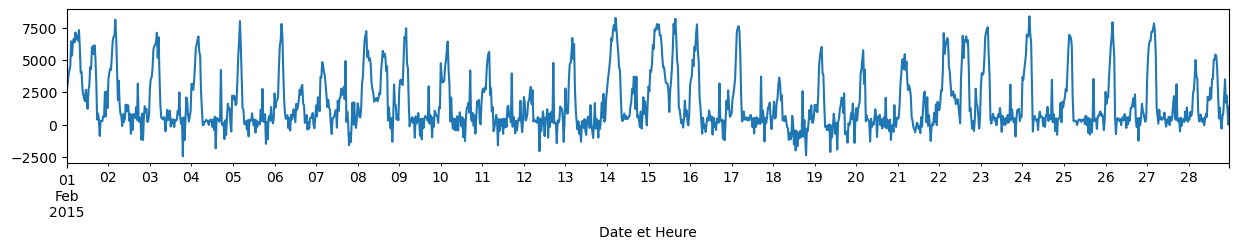

In [38]:
# Le bilan est approximativement nul ?

(
    df_national_simple.Production
    + df_national_simple.Echanges_commerciaux
    - df_national_simple.Consommation
    - df_national_simple.Pompage

) .loc['2015-02'] \
  .plot(
      figsize=(15,2)
  )

### Analyser la saisonnalité des données

In [39]:
# Autonomie énergétique par année

# On utilise un grouper pour finement gérer ce que l'on cherche
# grouper = pd.Grouper(freq='1ME')
df_national_simple['month_number'] = df_national_simple.reset_index()['Date et Heure'].dt.month.values
df_national_simple['year'] = df_national_simple.reset_index()['Date et Heure'].dt.year.values


In [40]:
idx = pd.date_range(start='2018-01', freq='ME', periods=12)
months = idx.month_name()

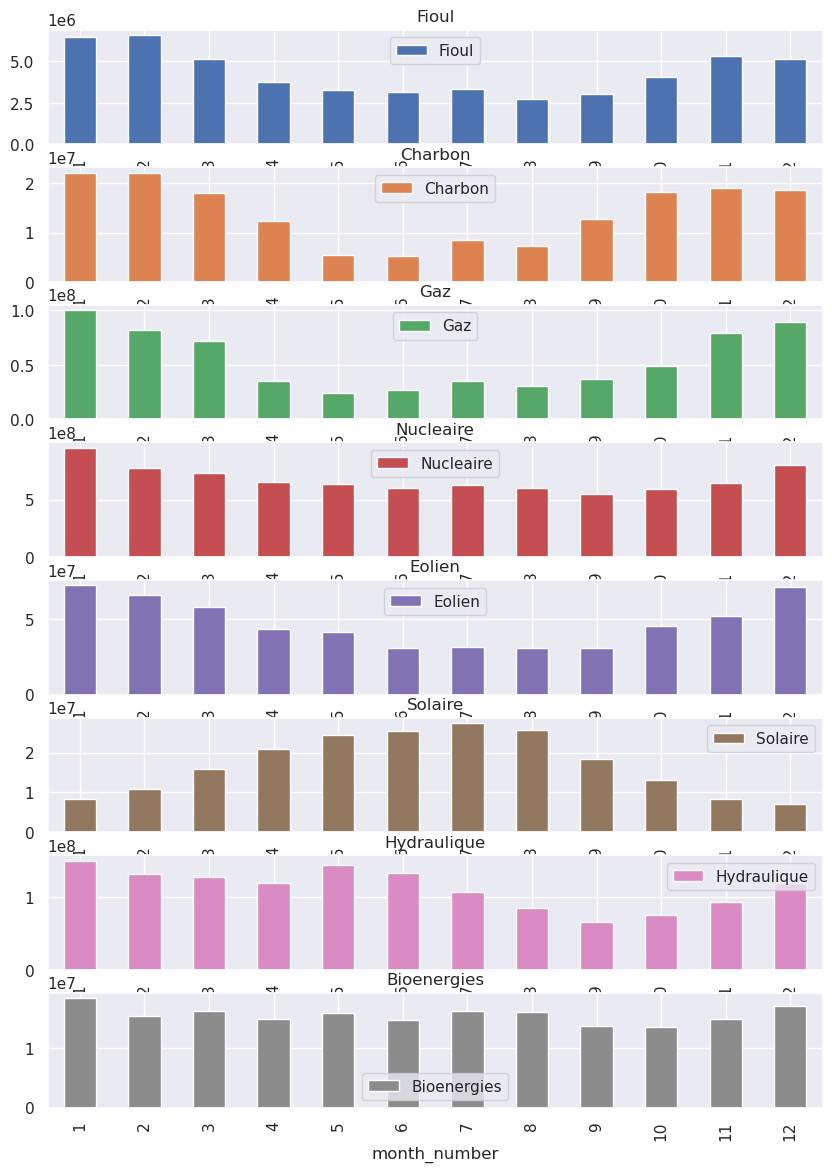

In [169]:
idx = pd.date_range(start='2018-01', freq='ME', periods=12)

(
    df_national_simple.groupby('month_number')[production]
        .sum()
        .plot.bar( 
            figsize=(10, 14), 
            subplots=True,
            sharex=False
        )
)
plt.show()

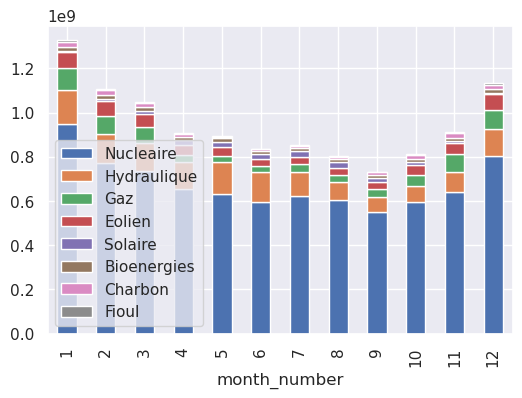

In [170]:
# On réorganise les colonnes pour mettre les plus gros producteurs en bas du plot
columns_sorted = df_national_simple.loc[:, production].sum(
).sort_values(ascending=False).index


(
    df_national_simple.groupby('month_number')[production]
        .sum()
        .reindex(columns_sorted, axis=1)
        .plot.bar(stacked=True)
)
plt.show()

<Axes: xlabel='Date et Heure'>

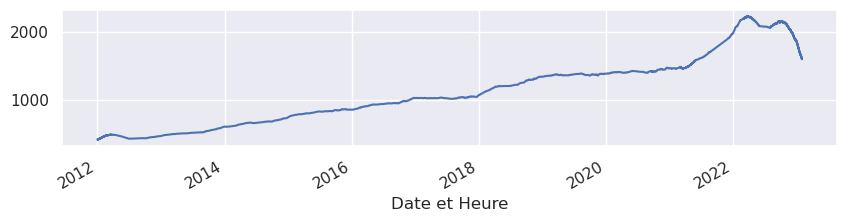

In [181]:
# Analyse de la tendance à long terme de la production d'énergie solaire
df_national_simple.Solaire.rolling(
    pd.Timedelta(value=365, unit='D'),
    center=True, 
).mean().plot(
    figsize=(10, 2)
)

### Impact des sources primaires de production sur le Taux de CO2 

Les énergies renouvelables sont négativement corrélées avec le taux de CO2 produit

<Axes: >

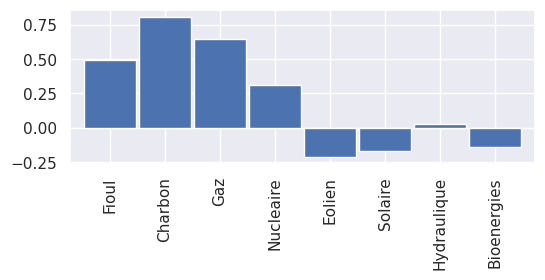

In [76]:
corr_matrix = df_national[production + ['Taux_CO2'] ].corr()['Taux_CO2']
corr_matrix[production].plot.bar(
    figsize = (6, 2),
    width=0.95
)

<Axes: >

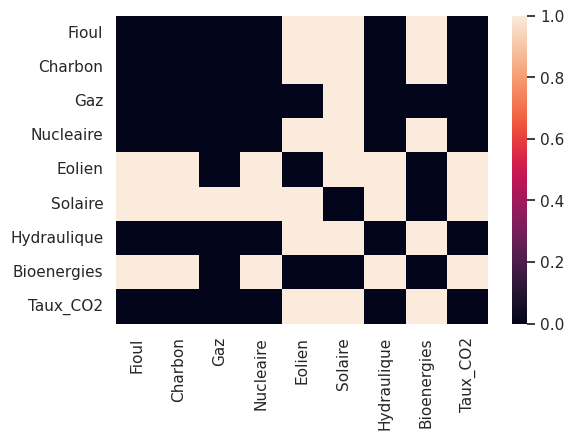

In [72]:
corr_matrix = df_national[production + ['Taux_CO2'] ].corr()

import seaborn as sns 
sns.set_theme(rc={'figure.figsize':(6,4)})

sns.heatmap(corr_matrix < 0)

### Géopolitique

In [45]:
# TO DO

<Axes: xlabel='Date et Heure'>

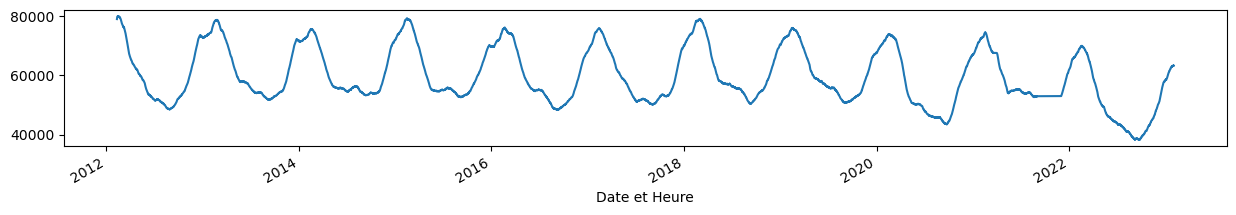

In [46]:
df_national.loc[:, production].sum(axis=1).rolling(window=2000).mean().plot()

<Axes: xlabel='Date et Heure'>

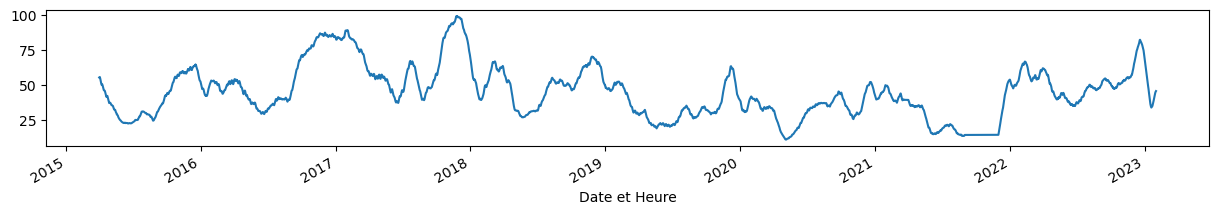

In [47]:
df_national.loc['1-Mar-2015':, 'Taux_CO2'].rolling(window=1500).mean().plot()